In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/deep_learning/dataset.zip

Streaming output truncated to the last 5000 lines.
 extracting: dataset/lateblight/l262.png  
 extracting: dataset/lateblight/l263.png  
 extracting: dataset/lateblight/l264.png  
 extracting: dataset/lateblight/l265.png  
 extracting: dataset/lateblight/l266.png  
 extracting: dataset/lateblight/l267.png  
 extracting: dataset/lateblight/l268.png  
 extracting: dataset/lateblight/l269.png  
 extracting: dataset/lateblight/l27.png  
 extracting: dataset/lateblight/l270.png  
 extracting: dataset/lateblight/l271.png  
 extracting: dataset/lateblight/l272.png  
 extracting: dataset/lateblight/l273.png  
 extracting: dataset/lateblight/l274.png  
 extracting: dataset/lateblight/l275.png  
  inflating: dataset/lateblight/l276.png  
  inflating: dataset/lateblight/l277.png  
 extracting: dataset/lateblight/l278.png  
 extracting: dataset/lateblight/l279.png  
 extracting: dataset/lateblight/l28.png  
  inflating: dataset/lateblight/l280.png  
  inflating: dataset/lateblight/l281.png  
  inf

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import tensorflow as tf


from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16

In [ ]:
SIZE = 128  #Resize images

#Capture training data and labels into respective lists
train_images = []
train_labels = [] 
for directory_path in glob.glob("dataset/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")) or glob.glob(os.path.join(directory_path, "*.png")):
        print(img_path)
        if img_path == "dataset/healthy/h196.png" or img_path=="dataset/yellowcurved/y2110.jpg":
          continue
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)


Streaming output truncated to the last 5000 lines.
dataset/septoriaLeafSpot/sep264.jpg
dataset/septoriaLeafSpot/sep289.jpg
dataset/septoriaLeafSpot/sep75.jpg
dataset/septoriaLeafSpot/sep384.jpg
dataset/septoriaLeafSpot/sep511.jpg
dataset/septoriaLeafSpot/sep589.jpg
dataset/septoriaLeafSpot/sep89.jpg
dataset/septoriaLeafSpot/sep471.jpg
dataset/septoriaLeafSpot/sep434.jpg
dataset/septoriaLeafSpot/sep467.jpg
dataset/septoriaLeafSpot/sep501.jpg
dataset/septoriaLeafSpot/sep58.jpg
dataset/septoriaLeafSpot/sep313.jpg
dataset/septoriaLeafSpot/sep568.jpg
dataset/septoriaLeafSpot/sep472.jpg
dataset/septoriaLeafSpot/sep349.jpg
dataset/septoriaLeafSpot/sep372.jpg
dataset/septoriaLeafSpot/sep324.jpg
dataset/septoriaLeafSpot/sep188.jpg
dataset/septoriaLeafSpot/sep546.jpg
dataset/septoriaLeafSpot/sep138.jpg
dataset/septoriaLeafSpot/sep279.jpg
dataset/septoriaLeafSpot/sep162.jpg
dataset/septoriaLeafSpot/sep418.jpg
dataset/septoriaLeafSpot/sep146.jpg
dataset/septoriaLeafSpot/sep261.jpg
dataset/septoria

In [ ]:
#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)
train_labels

array(['dataset/lateblight', 'dataset/lateblight', 'dataset/lateblight',
       ..., 'dataset/Healthy', 'dataset/Healthy', 'dataset/Healthy'],
      dtype='<U24')

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

# for y
y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (train_labels)
#print (y)

y=y.reshape(-1,1)
# print(y.shape, type(y))
onehotencoder = OneHotEncoder(sparse=False)  #Converted  scalar output into vector output where the correct class will be 1 and other will be 0
train_labels_encoded= onehotencoder.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(train_images,train_labels_encoded, test_size = 0.2, random_state = 42)
train_labels_encoded[0]

array([0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

#One hot encode y values for neural network. 
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#############################
#Load model wothout classifier/fully connected layers
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))



#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
# Freeze four convolution blocks
for layer in vgg_model.layers:
    layer.trainable = False
# Make sure you have frozen the correct layers
for i, layer in enumerate(vgg_model.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False


In [ ]:
x = vgg_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dense(8, activation='sigmoid')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg_model.input, outputs=x)

In [ ]:
from tensorflow.keras import layers, models, Model, optimizers
learning_rate= 0.00001
transfer_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(learning_rate), metrics=["accuracy"])
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/Colab_Notebooks/checkpoint',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
history = transfer_model.fit(x_train, y_train, epochs = 20, batch_size = 32, validation_data=(x_test,y_test), callbacks=[model_checkpoint_callback]) 

Epoch 1/20
160/160 [==============================] - 12s 74ms/step - loss: 1.0629 - accuracy: 0.6487 - val_loss: 0.7161 - val_accuracy: 0.7881
Epoch 2/20
160/160 [==============================] - 11s 71ms/step - loss: 0.5705 - accuracy: 0.8319 - val_loss: 0.4815 - val_accuracy: 0.8733
Epoch 3/20
160/160 [==============================] - 11s 72ms/step - loss: 0.4111 - accuracy: 0.8989 - val_loss: 0.3810 - val_accuracy: 0.9085
Epoch 4/20
160/160 [==============================] - 11s 72ms/step - loss: 0.3283 - accuracy: 0.9255 - val_loss: 0.3167 - val_accuracy: 0.9273
Epoch 5/20
160/160 [==============================] - 11s 71ms/step - loss: 0.2754 - accuracy: 0.9380 - val_loss: 0.2757 - val_accuracy: 0.9320
Epoch 6/20
160/160 [==============================] - 11s 71ms/step - loss: 0.2387 - accuracy: 0.9507 - val_loss: 0.2480 - val_accuracy: 0.9406
Epoch 7/20
160/160 [==============================] - 11s 70ms/step - loss: 0.2111 - accuracy: 0.9562 - val_loss: 0.2234 - val_accuracy:

In [ ]:
transfer_model.load_weights('/content/drive/MyDrive/Colab_Notebooks/checkpoint')
preds = transfer_model.evaluate(x_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]*100)+"%")

40/40 [==============================] - 2s 56ms/step - loss: 0.1170 - accuracy: 0.9703
Loss = 0.11696521192789078
Test Accuracy = 97.02892899513245%


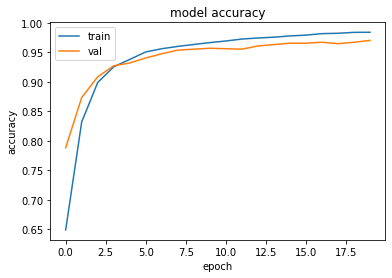

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
SIZE=128
inception_model=InceptionV3(input_shape=(SIZE,SIZE,3),include_top=False,weights='imagenet')
# Freeze four convolution blocks
for layer in inception_model.layers:
    layer.trainable = False


87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
x = inception_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dense(8, activation='sigmoid')(x) # Softmax for multiclass
transfer_model = Model(inputs=inception_model.input, outputs=x)

In [ ]:
from tensorflow.keras import layers, models, Model, optimizers
learning_rate= 0.00001
transfer_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(learning_rate), metrics=["accuracy"])
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/Colab_Notebooks/checkpoint1',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
history = transfer_model.fit(x_train, y_train, epochs = 20, batch_size = 32, validation_data=(x_test,y_test), callbacks=[model_checkpoint_callback]) 

Epoch 1/20
160/160 [==============================] - 15s 66ms/step - loss: 0.8833 - accuracy: 0.7246 - val_loss: 0.5122 - val_accuracy: 0.8327
Epoch 2/20
160/160 [==============================] - 8s 53ms/step - loss: 0.3756 - accuracy: 0.8851 - val_loss: 0.3729 - val_accuracy: 0.8726
Epoch 3/20
160/160 [==============================] - 7s 44ms/step - loss: 0.2549 - accuracy: 0.9251 - val_loss: 0.3055 - val_accuracy: 0.9007
Epoch 4/20
160/160 [==============================] - 7s 44ms/step - loss: 0.1921 - accuracy: 0.9447 - val_loss: 0.2755 - val_accuracy: 0.9093
Epoch 5/20
160/160 [==============================] - 7s 43ms/step - loss: 0.1530 - accuracy: 0.9590 - val_loss: 0.2500 - val_accuracy: 0.9187
Epoch 6/20
160/160 [==============================] - 7s 44ms/step - loss: 0.1240 - accuracy: 0.9699 - val_loss: 0.2342 - val_accuracy: 0.9203
Epoch 7/20
160/160 [==============================] - 6s 40ms/step - loss: 0.1007 - accuracy: 0.9769 - val_loss: 0.2278 - val_accuracy: 0.918

In [ ]:
transfer_model.load_weights('/content/drive/MyDrive/Colab_Notebooks/checkpoint1')
preds = transfer_model.evaluate(x_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy% = " + str(preds[1]*100))

40/40 [==============================] - 1s 34ms/step - loss: 0.1925 - accuracy: 0.9335
Loss = 0.19246521592140198
Test Accuracy = 93.35418343544006


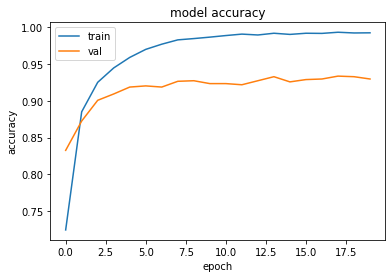

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:

model = tf.keras.applications.resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))
for layer in model.layers:
    layer.trainable = False
x = model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dense(8, activation='sigmoid')(x) # Softmax for multiclass
transfer_model = Model(inputs=model.input, outputs=x)

In [ ]:
from tensorflow.keras import layers, models, Model, optimizers
learning_rate= 0.00001
transfer_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(learning_rate), metrics=["accuracy"])
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/Colab_Notebooks/checkpoint3',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
history = transfer_model.fit(x_train, y_train, epochs = 40, batch_size = 32, validation_data=(x_test,y_test), callbacks=[model_checkpoint_callback]) 

Epoch 1/20
160/160 [==============================] - 15s 78ms/step - loss: 0.9460 - accuracy: 0.6943 - val_loss: 0.9809 - val_accuracy: 0.6701
Epoch 2/20
160/160 [==============================] - 11s 67ms/step - loss: 0.9362 - accuracy: 0.6974 - val_loss: 0.9669 - val_accuracy: 0.6755
Epoch 3/20
160/160 [==============================] - 11s 68ms/step - loss: 0.9216 - accuracy: 0.7039 - val_loss: 0.9541 - val_accuracy: 0.6771
Epoch 4/20
160/160 [==============================] - 10s 62ms/step - loss: 0.9110 - accuracy: 0.7033 - val_loss: 0.9363 - val_accuracy: 0.6857
Epoch 5/20
160/160 [==============================] - 10s 62ms/step - loss: 0.9002 - accuracy: 0.7107 - val_loss: 0.9326 - val_accuracy: 0.6998
Epoch 6/20
160/160 [==============================] - 9s 53ms/step - loss: 0.8894 - accuracy: 0.7144 - val_loss: 0.9235 - val_accuracy: 0.6833
Epoch 7/20
160/160 [==============================] - 10s 61ms/step - loss: 0.8829 - accuracy: 0.7166 - val_loss: 0.9057 - val_accuracy: 

In [ ]:
transfer_model.load_weights('/content/drive/MyDrive/Colab_Notebooks/checkpoint3')
preds = transfer_model.evaluate(x_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy% = " + str(preds[1]*100))

40/40 [==============================] - 68s 2s/step
Accuracy% =  73.182173573104


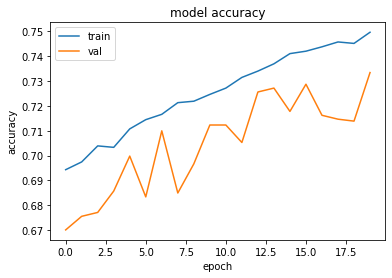

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()